In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import the cleaned-up data
import pandas as pd
filename='/content/drive/MyDrive/Coding Dojo/Week 3/FoodSalesPrediction.csv'
df=pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,13.430000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,3485.3288
1,DRC01,12.277109,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,395.1536
2,FDN15,12.820000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1955.6520
3,FDX07,13.220000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,550.2850
4,NCD19,13.380000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,940.8438


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# create the dataframes to show the MRP, outlet sales and profit for each item
type_mrp=df.groupby(['Item_Type'],as_index=False)[['Item_MRP','Profit','Item_Outlet_Sales']].mean().sort_values(by=['Item_MRP'])
type_sales=df.groupby(['Item_Type'],as_index=False)[['Item_MRP','Profit','Item_Outlet_Sales']].mean().sort_values(by=['Item_Outlet_Sales'])
type_profit=df.groupby(['Item_Type'],as_index=False)[['Item_MRP','Profit','Item_Outlet_Sales']].mean().sort_values(by=['Profit'])

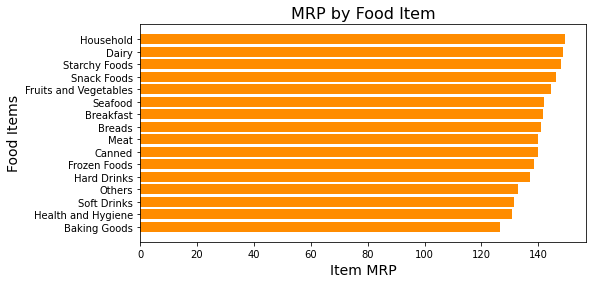

In [8]:
# create graph to show the MRP for each food sorted by MRP
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,4))
axes.barh(type_mrp['Item_Type'],type_mrp['Item_MRP'],color=['darkorange'])
axes.set_xlabel('Item MRP',fontsize=14)
axes.set_ylabel('Food Items', fontsize=14)
axes.set_title('MRP by Food Item', fontsize=16);

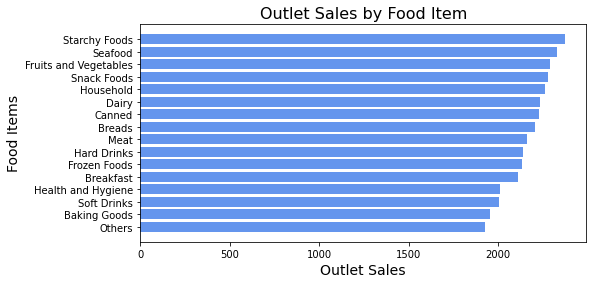

In [111]:
# create graph to show the outlet sales for each food sorted by outlet sales
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,4))
axes.barh(type_sales['Item_Type'],type_sales['Item_Outlet_Sales'],color='cornflowerblue')
axes.set_xlabel('Outlet Sales',fontsize=14)
axes.set_ylabel('Food Items', fontsize=14)
axes.set_title('Outlet Sales by Food Item', fontsize=16);

Text(0.5, 1.0, 'Profit by Food Item')

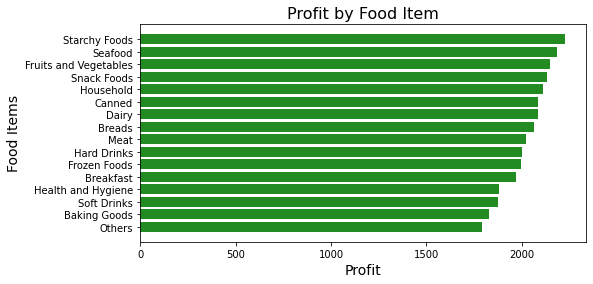

In [115]:
# create graph to show the profit for each food sorted by profit
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,4))
axes.barh(type_profit['Item_Type'],type_profit['Profit'],color='forestgreen')
axes.set_xlabel('Profit',fontsize=14)
axes.set_ylabel('Food Items', fontsize=14)
axes.set_title('Profit by Food Item', fontsize=16)

<Figure size 720x360 with 0 Axes>

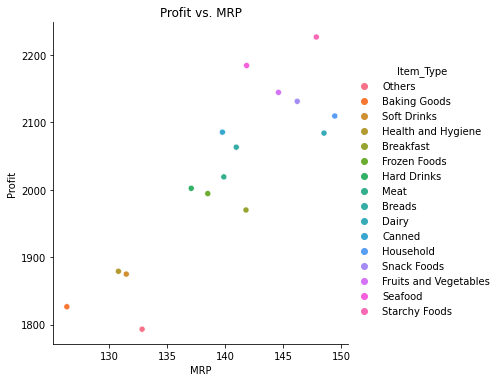

In [9]:
# show relationship between MRP and Profit, food items are differntiated by color
plt.figure(figsize=(10,5))
sns.relplot(data=type_profit,x='Item_MRP',y='Profit',hue='Item_Type')
plt.xlabel('MRP')
plt.ylabel('Profit')
plt.title('Profit vs. MRP');

In [10]:
# create the dataframe to get the overall average profit by fat content
fat=df.groupby(['Item_Fat_Content'], as_index=False)['Profit'].mean()

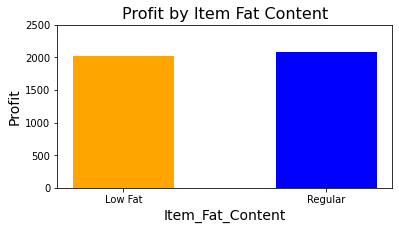

In [12]:
# create the graph to show which category under item fat content has higher profit
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(6,3))
axes.bar(fat['Item_Fat_Content'],fat['Profit'],width=0.5,color=['orange','blue'])
axes.set_xlabel('Item_Fat_Content',fontsize=14)
axes.set_ylabel('Profit', fontsize=14)
axes.set_ylim(bottom=0,top=2500)
axes.set_title('Profit by Item Fat Content', fontsize=16);

In [13]:
# create the dataframe to get the mean profit by each food item and fat content
df1=df.groupby(['Item_Type','Item_Fat_Content'], as_index=False)[['Profit']].mean()

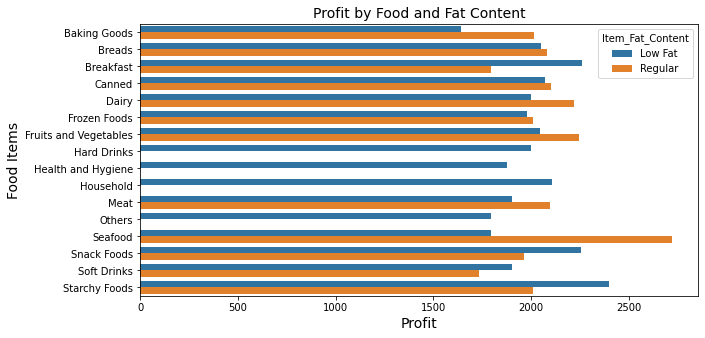

In [15]:
# create the graph to show the profit by fat content for each food item
plt.figure(figsize=(10,5))
sns.barplot(data=df1, y='Item_Type',x='Profit',hue='Item_Fat_Content')
plt.xticks(fontsize=10)
plt.xlabel('Profit',fontsize=14)
plt.ylabel('Food Items',fontsize=14)
plt.title('Profit by Food and Fat Content',fontsize=14);

In [17]:
# create the dataframe to get the mean profit by outlet type for each food item and 
df_outlet=df.groupby(['Item_Type','Outlet_Type'],as_index=False)[['Profit']].mean()

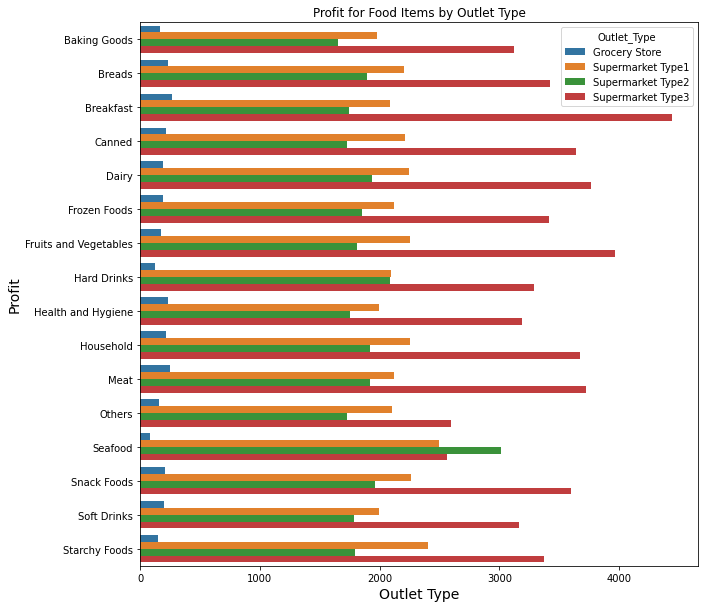

In [19]:
# create the graph to show the profit by outlet type for each food item
plt.figure(figsize=(10,10))
sns.barplot(data=df_outlet,y='Item_Type',x='Profit',hue='Outlet_Type')
plt.xlabel('Outlet Type',fontsize=14)
plt.ylabel('Profit',fontsize=14)
plt.title('Profit for Food Items by Outlet Type');